In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:

path = r'c:\Users\Admin\Downloads\bank-additional\bank-additional\bank-additional-full.csv'
data = pd.read_csv(path, sep=';')


print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [6]:


X = data.drop('y', axis=1)
y = data['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


y_pred = dt_classifier.predict(X_test)

Accuracy: 0.8892935178441369
Confusion Matrix:
 [[10275   693]
 [  675   714]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



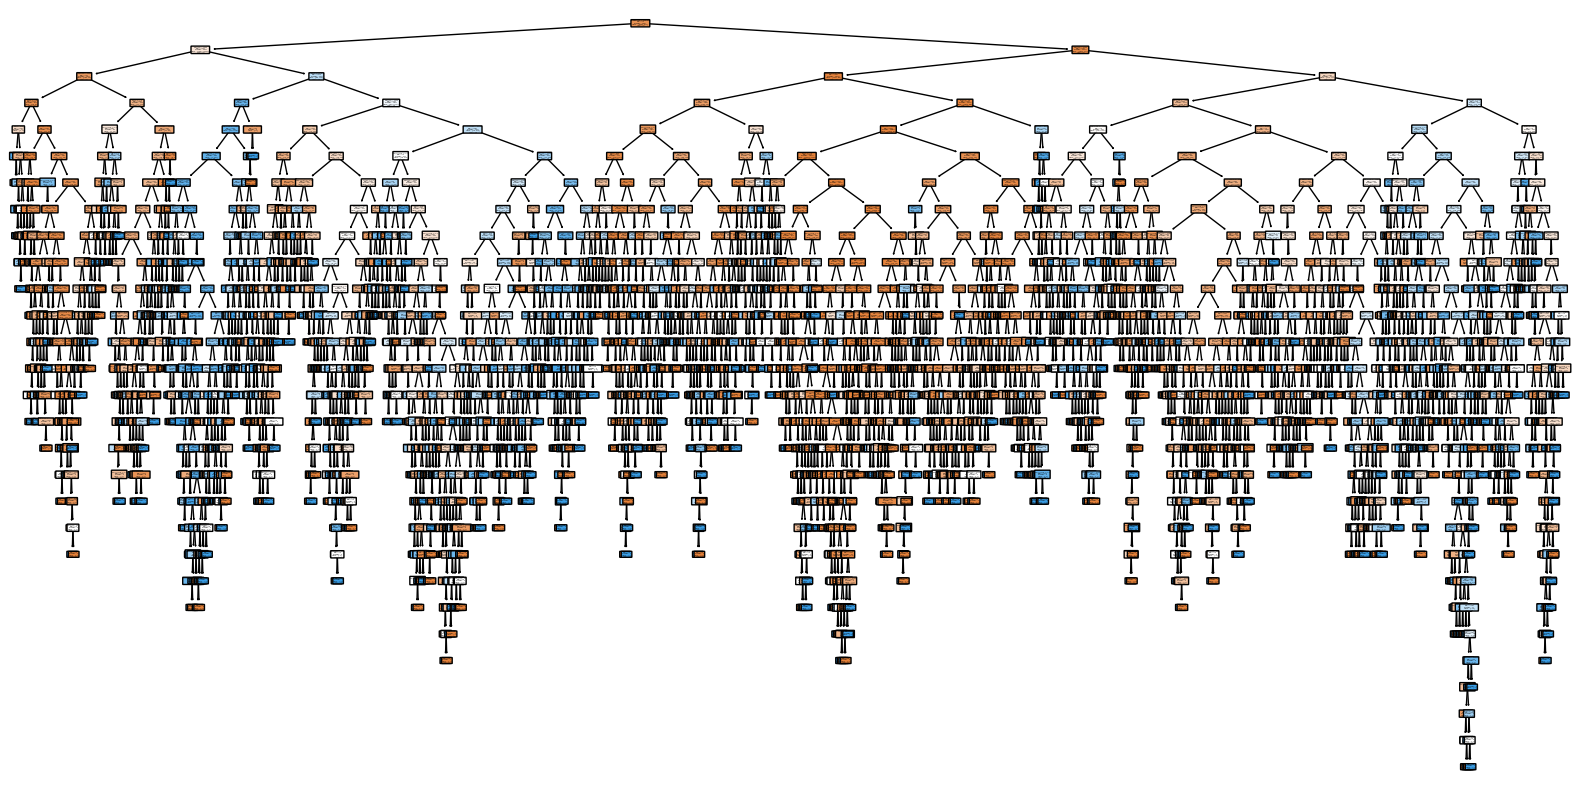

In [7]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()
